In [1]:
!pip install tensorflow
!pip install keras

! pip install numpy scipy

    100% |████████████████████████████████| 86.3MB 289kB/s eta 0:00:01    39% |████████████▋                   | 34.0MB 72.8MB/s eta 0:00:01    67% |█████████████████████▌          | 58.0MB 36.1MB/s eta 0:00:01
    100% |████████████████████████████████| 3.8MB 7.3MB/s eta 0:00:01
    100% |████████████████████████████████| 1.3MB 15.5MB/s ta 0:00:01
    100% |████████████████████████████████| 2.3MB 2.8MB/s eta 0:00:01
    100% |████████████████████████████████| 71kB 27.6MB/s ta 0:00:01
    100% |████████████████████████████████| 112kB 27.9MB/s ta 0:00:01
    100% |████████████████████████████████| 61kB 24.5MB/s ta 0:00:01
    100% |████████████████████████████████| 51kB 17.7MB/s ta 0:00:01
    100% |████████████████████████████████| 450kB 25.6MB/s ta 0:00:01
    100% |████████████████████████████████| 51kB 24.6MB/s ta 0:00:01
    100% |████████████████████████████████| 327kB 20.0MB/s ta 0:00:01
    100% |████████████████████████████████| 583kB 22.4MB/s ta 0:00:01
    100% |█████████████

In [2]:
import tensorflow as tf
from tensorflow import keras

from keras.models import Sequential

import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [3]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
x_train.shape

(60000, 28, 28)

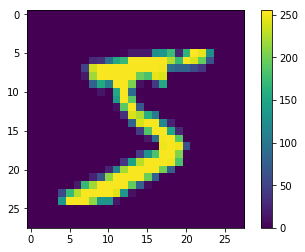

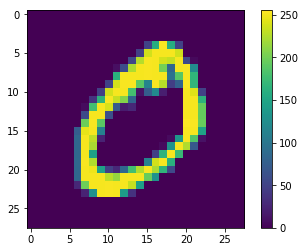

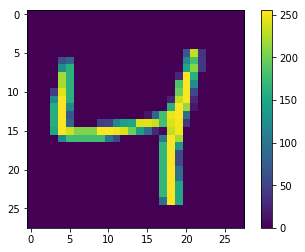

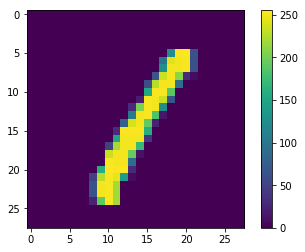

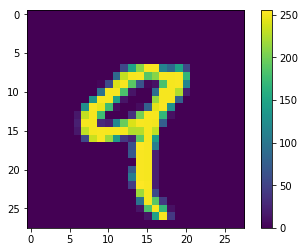

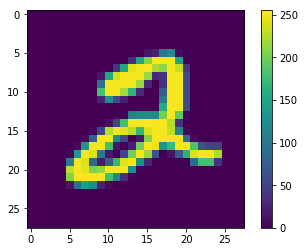

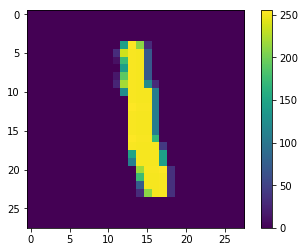

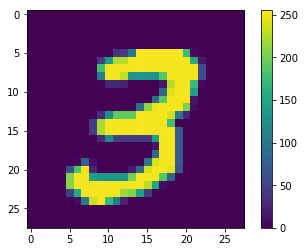

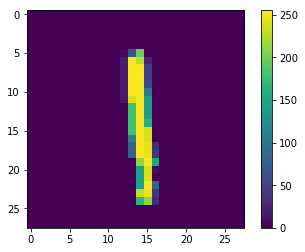

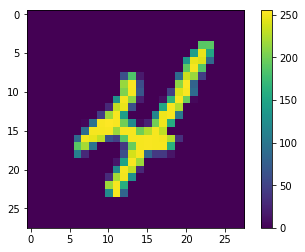

In [5]:
for i in range(10):
    plt.figure()
    plt.imshow(x_train[i])
    plt.colorbar()
    plt.grid(False)
    plt.show()

In [6]:
from keras.utils import np_utils
#изначально ответы заданы в виде чисел, но нам нужно их преобразовать в виде вектора с одной единицей
#т.е. изначально было в ответе 2 -> стало [0,1,0,0,0,0,0,0,0,0]   1->[1,0,0,0,0,0,0,0,0,0]
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [7]:
#также нужно нормализовать пиксели до значений от 0 до 1, а также все в один вектор 28*28
x_train = x_train.reshape([-1, 28*28]) / 255.
x_test = x_test.reshape([-1, 28*28]) / 255.

In [8]:
x_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [9]:
def create_model(init):
    model = keras.Sequential()
    model.add(keras.layers.Dense(100, input_shape=(28*28,), kernel_initializer=init, activation='tanh'))
    model.add(keras.layers.Dense(100, kernel_initializer=init, activation='tanh'))
    model.add(keras.layers.Dense(100, kernel_initializer=init, activation='tanh'))
    model.add(keras.layers.Dense(100, kernel_initializer=init, activation='tanh'))
    model.add(keras.layers.Dense(10, kernel_initializer=init, activation='softmax'))
    return model

In [10]:
uniform_model = create_model("uniform")
uniform_model.compile(
loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
uniform_model.fit(x_train, y_train,
batch_size=64, nb_epoch=30, verbose=1, validation_data=(x_test, y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 10s 164us/sample - loss: 2.3003 - accuracy: 0.1131 - val_loss: 2.2983 - val_accuracy: 0.1135
Epoch 2/30
60000/60000 [==============================] - 8s 134us/sample - loss: 2.2959 - accuracy: 0.1124 - val_loss: 2.2916 - val_accuracy: 0.1135
Epoch 3/30
60000/60000 [==============================] - 8s 141us/sample - loss: 2.2707 - accuracy: 0.1711 - val_loss: 2.1883 - val_accuracy: 0.2194
Epoch 4/30
60000/60000 [==============================] - 8s 139us/sample - loss: 1.8359 - accuracy: 0.2987 - val_loss: 1.3957 - val_accuracy: 0.4820
Epoch 5/30
60000/60000 [==============================] - 8s 137us/sample - loss: 1.0359 - accuracy: 0.6213 - val_loss: 0.8302 - val_accuracy: 0.7135
Epoch 6/30
60000/60000 [==============================] - 8s 136us/sample - loss: 0.7677 - accuracy: 0.7411 - val_loss: 0.6787 - val_accuracy: 0.7975
Epoch 7/30
60000/60000 [=========================

Text(0.5, 0, 'Epoch')

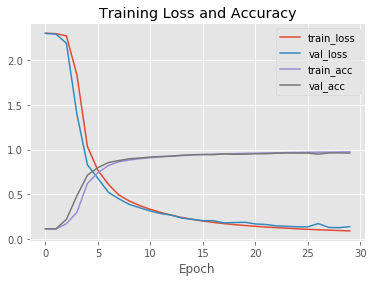

In [20]:
N = np.arange(0, 30)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, uniform_model.history.history["loss"], label="train_loss")
plt.plot(N, uniform_model.history.history["val_loss"], label="val_loss")
plt.plot(N, uniform_model.history.history["accuracy"], label="train_acc")
plt.plot(N, uniform_model.history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.legend()
plt.xlabel("Epoch")